# StationOutput

A class used to handle the AxiSEM3D station output in netcdf format. 

AxiSEM3D offers two different types of output formats: "elements" and "stations". "elements" is the raw format that gives the wavefield as lagrange-fourier coefficients at specific mesh points. The "stations" output provides the actual wavefield (after applying lagrange and fourier interpolation) at all the stations mentioned in some station text file that was used as input. For most users, the stations output will be preferable, as it decreases the simulation time significantly and requires much less disk space. The stations output can be further broken down in three formats: ASCII_STATION, ASCII_CHANNEL, and NETCDF. The first two are most comonly used due to their ease of use, but they are not the most efficient. The NETCDF format is the most efficient, but more cumbersome to use. The *StationOutput* class is used to transform this netcdf format in an Obspy comatible format (mseed for the actual data, xml inventory for the stations data, and xml catalogue for the source data). 

In [1]:
from axikernels.core.handlers import station_output
import matplotlib.pyplot as plt

To create a *StationOutput* instance we only need the path to the stations output of our simulation:

In [2]:
my_output = station_output.StationOutput('data/HANDLERS_EXAMPLE/output/stations/GSN_Station_Grid')

Because *StationsOutput* inherits from *AxiSEM3DOutput*, we have available all its methods and attributes:

In [3]:
my_output.outputs

{'elements': {'outer_core': {'path': '/disks/data/PhD/AxiSEM3D_Kernels/examples/data/HANDLERS_EXAMPLE/output/elements/outer_core',
   'obspyfied': None},
  'video_animation.mp4': {'path': '/disks/data/PhD/AxiSEM3D_Kernels/examples/data/HANDLERS_EXAMPLE/output/elements/video_animation.mp4',
   'obspyfied': None},
  'mantle': {'path': '/disks/data/PhD/AxiSEM3D_Kernels/examples/data/HANDLERS_EXAMPLE/output/elements/mantle',
   'obspyfied': None},
  'inner_core': {'path': '/disks/data/PhD/AxiSEM3D_Kernels/examples/data/HANDLERS_EXAMPLE/output/elements/inner_core',
   'obspyfied': None}},
 'stations': {'GSN_Station_Grid': {'path': '/disks/data/PhD/AxiSEM3D_Kernels/examples/data/HANDLERS_EXAMPLE/output/stations/GSN_Station_Grid',
   'obspyfied': {'path': '/disks/data/PhD/AxiSEM3D_Kernels/examples/data/HANDLERS_EXAMPLE/output/stations/GSN_Station_Grid/obspyfied',
    'mseed': ['/disks/data/PhD/AxiSEM3D_Kernels/examples/data/HANDLERS_EXAMPLE/output/stations/GSN_Station_Grid/obspyfied/GSN_Stati

Furhtermore, we also have access to the stations data in the form of an Obspy inventory: 

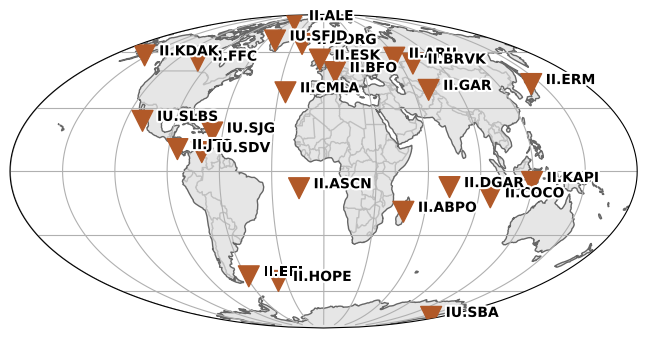

In [4]:
my_output.inventory.plot()
plt.show()

If we want to access some wavefield data in the form of an Obspy stream we can use the *.stream* method together with a list of all the networks, stations, locations, and channels that we want.

In [5]:
data = my_output.stream(networks=['II'], station_names=['CMLA'], locations=[''], channels=['UZ'])
print(data)

1 Trace(s) in Stream:
II.CMLA..UZ | 1969-12-31T23:58:57.337500Z - 1970-01-01T00:29:58.831500Z | 0.6 Hz, 1115 samples


and from there onwards we can use Obspy to process or visualize the data

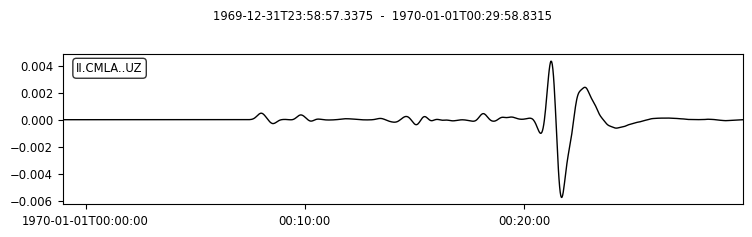

In [6]:
%matplotlib inline
data.plot()
plt.show()

Alternatively, the data can be loaded as a numpy array at a single station using (without the time data, which is stored in the *.data_time* attribute):

In [7]:
data = my_output.load_data_at_station(network='II', station_name='CMLA', channels=['U'])
print(data)

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.1712595e-04
   1.1465138e-04  1.1263466e-04]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.2851550e-05
   1.2485836e-05  1.2117720e-05]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -5.6868012e-06
  -4.6660352e-06 -3.6972742e-06]]


The method *.obspyfy()* creates a new folder in the output directory called "obspyfied" which contains the stations data as a xml inventory, the sources info as a xml catalogue, and all the wavefield data as an mseed file. 

In [8]:
my_output.obspyfy()

All of the obspyfied files can then be quickly read using the *ObspyfiedOutput* class:

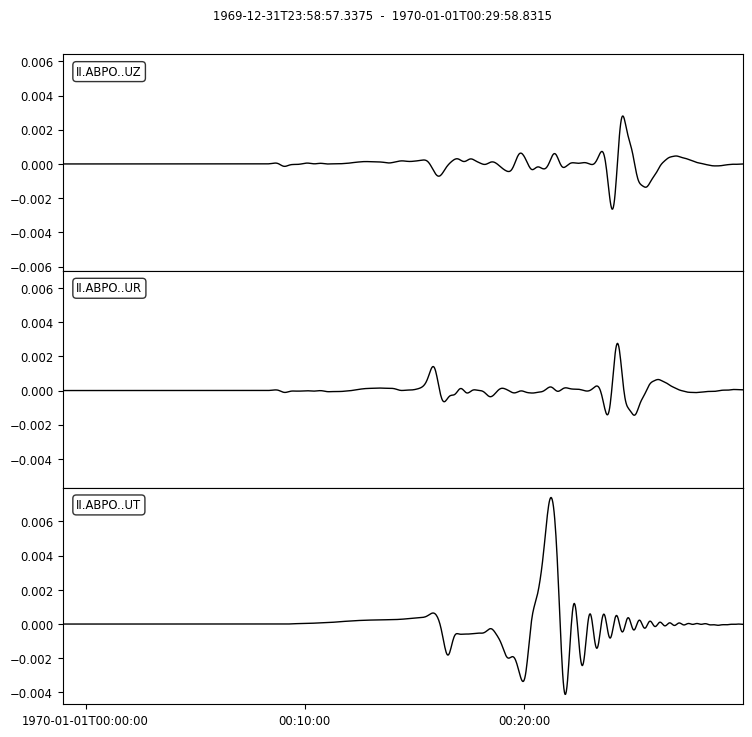

In [11]:
from axikernels.core.handlers import obspy_output
obspyfied_output = obspy_output.ObspyfiedOutput(obspyfied_path='data/HANDLERS_EXAMPLE/output/stations/GSN_Station_Grid/obspyfied')
obspyfied_output.stream[0:3].plot()
plt.show()